# **LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import joblib
import gc
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass  import unique_labels
from sklearn.metrics import  accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# **DATASET**

In [ ]:
# Import the drive function from google.colab library.
from google.colab import drive

# Mount Google Drive into the Colab environment.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""df = pd.read_pickle("/content/drive/MyDrive/ProgettoDataMining/df_statistic.pkl")
encoded_images = np.load("/content/drive/MyDrive/ProgettoDataMining/W.npy")
X = pd.DataFrame(encoded_images)
y = df["Label"]
df1 = pd.concat([X, y], axis=1)
path = "/content/drive/MyDrive/ProgettoDataMining/df_complete_statistic.pkl"
df1.to_pickle(path)"""

In [ ]:
# Upload the dataset.
df = pd.read_pickle("/content/drive/MyDrive/ProgettoDataMining/df_statistic2.pkl")

In [ ]:
# Count the unique values in the "Label" column of the DataFrame df and display the count of each unique label.
df["Label"].value_counts()

Label
notumor            1500
glioma             1426
pituitary tumor     930
meningioma          708
Name: count, dtype: int64

# **BALANCED SUBSAMPLE**

In [ ]:
# Define the number of samples to select for each class label.
num_for_each_class = 700
# Initialize an empty DataFrame that will store the balanced data.
new_df = pd.DataFrame()

# Iterate over each unique label in the original DataFrame.
for i in df["Label"].unique():
  # Print the current label (for monitoring purposes).
  print(i)
  # Create a subset of the original DataFrame containing only the rows with the current label.
  sample = df[df["Label"] == i]
  # Randomly select 700 samples from the filtred DataFrame.
  sample = sample.sample(n=num_for_each_class, random_state=42)
  # Concatenate the sampled subset to the new DataFrame.
  new_df = pd.concat([new_df, sample])

notumor
glioma
meningioma
pituitary tumor


In [ ]:
# Display the new DataFrame.
new_df

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,Label
3406,0.000000,0.000000,0.030481,0.111523,0.000000,0.000000,0.000000,0.027530,0.009389,0.030529,...,0.000000,0.245604,0.104333,0.201886,0.000000,0.051350,0.000000,0.000000,0.081006,notumor
4170,0.000000,0.000000,0.013988,0.007746,0.030613,0.046876,0.000000,0.030550,0.000000,0.011318,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.129474,0.235929,0.000000,0.000000,notumor
1270,0.018946,0.000000,0.000000,0.201267,0.000000,0.016790,0.109721,0.000000,0.041440,0.000000,...,0.143548,0.000000,0.000000,0.039430,0.166074,0.000000,0.000000,0.001591,0.021613,notumor
1229,0.000000,0.000000,0.000000,0.120025,0.000000,0.000000,0.000000,0.021770,0.000000,0.058064,...,0.000000,0.391378,0.000000,0.000000,0.365067,0.000000,0.000000,0.000000,0.000000,notumor
1340,0.020294,0.000000,0.045492,0.063340,0.081659,0.000000,0.000000,0.067085,0.014198,0.000000,...,0.000000,0.057348,0.000000,0.000000,0.000000,0.041907,0.010764,0.000000,0.000000,notumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,0.000000,0.000000,0.000000,0.000000,0.000000,0.417495,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061887,0.000000,0.280589,pituitary tumor
2010,0.000000,0.148561,0.121460,0.000000,0.000000,0.000000,0.000000,0.000000,0.862184,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.024427,0.000000,7.625564,0.000000,0.065773,pituitary tumor
4377,0.000000,0.059218,0.000000,0.027670,0.000000,0.000000,0.331674,0.000000,0.000000,0.000000,...,1.070234,0.000000,0.000000,0.000000,0.439996,0.385793,29.202197,0.098716,3.165074,pituitary tumor
2604,0.000000,0.668777,0.191697,0.000000,0.000000,0.000000,0.000000,0.000000,4.211883,0.000000,...,0.000000,0.519825,0.000000,0.327882,1.594450,0.000000,10.470703,0.000000,0.000000,pituitary tumor


# **DATA PREPARATIONS**

In [ ]:
# Remove the column named Label from the DataFrame 'new_df' to obtain the features matrix X.
X = new_df.drop('Label', axis=1, inplace=False)

In [ ]:
# Extract the class labels associated with each sample from the DataFrame 'new_df' and assign them to the variable y.
y = new_df["Label"].copy()

In [ ]:
# Obtain the unique class labels from the variable y and store them in the array 'labels'.
labels = y.unique()

In [ ]:
# Split the data into training and test sets with a test size of 25% (and training size of 75%).
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)

# Print out the proportion of each class in both the training and test sets.
print("Proportion of training classes:")
print(y_train.value_counts(normalize=True))

print("\nProportion of test classes:")
print(y_test.value_counts(normalize=True))

Proportion of training classes:
Label
pituitary tumor    0.25
notumor            0.25
glioma             0.25
meningioma         0.25
Name: proportion, dtype: float64

Proportion of test classes:
Label
glioma             0.25
meningioma         0.25
pituitary tumor    0.25
notumor            0.25
Name: proportion, dtype: float64


In [ ]:
# Convert the column names of the DataFrame X into a new array features_name where each column name is represented as a string.
features_name = X.columns.astype(str)

In [ ]:
# Reset the index to create a range of indices from 0 to len(X)-1.
index = np.arange(len(X))

# Calculate the split index based on the test size. split_index marks the boundary between the training and test sets.
split_index = int(len(index) * (1-test_size))

# Divide the index array into two parts: train_index, containing the indices for the training set; test_index, containing the indices for the test set.
train_index = index[:split_index]
test_index = index[split_index :]

In [ ]:
#X_train = X_train.set_index(train_index, drop=True)
#X_test = X_test.set_index(test_index, drop=True)

# Assign the new training and test indices to X_train, X_test, y_train, and y_test to maintain the alignment between features and labels, as well as between training and testing datasets.
X_train.index = train_index
X_test.index = test_index
y_train.index = train_index
y_test.index = test_index

# **FUNCTION TO EVALUATE MODEL'S PERFORMANCE**

In [ ]:
# Define a function to evaluate the performance of a classification model using various metrics and visualizations.
def evaluate_metrics(y_pred, y_test):
    # Obtain and print unique labels from y_test and y_pred.
    labels = unique_labels(y_test, y_pred)
    print(labels)
    # Generate and print a classification report showing precision, recall, F1-score, and support for each class.
    report = classification_report(y_test, y_pred, target_names=labels)
    print(report)
    # Add spacing for clarity.
    print( "\n"*5)
    # Generate and display a confusion matrix.
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    plt.figure(figsize=(8, 6))
    cm_display.plot()
    plt.title('Confusion Matrix')
    plt.show()

# **LOGISTIC REGRESSION (LINEAR MODEL)**

## **One-vs-Rest (OvR) LASSO Logistic Regression**

We consider  every couples of class  respect the others, with classical logistic regression, In this way we estimate 4  voters model, that determine the output(range 0-1). The model with high output will determine the response class

In [ ]:
# Define the common parameters for the LASSO Logistic Regression.
common_params = {
    'penalty': 'l1',        # Use L1 regularization (LASSO)
    'random_state': 42,     # Ensure reproducibility
    'refit': True,          # Refit the model with the best parameters
    'multi_class': 'ovr',   # Use the One-vs-Rest strategy for multi-class classification
    'solver': 'liblinear',  # Use the 'liblinear' solver, compatible with L1 penalty
    'cv': 5,                # Perform 5-fold cross-validation
    'scoring': 'accuracy'   # Use accuracy as the scoring metric
}

# Initialize the LASSO Logistic Regression with cross-validation (CV). By default, it evaluates regularization strengths (penalties) between 10^-4 and 10^4.
logitic_regression_ovr = LogisticRegressionCV(n_jobs=-1, **common_params)
# Fit the model to the training data.
logitic_regression_ovr.fit(X_train, y_train)

# Print the range of regularization strengths evaluated during cross-validation.
print("The penalties evaluated are:", "\n", logitic_regression_ovr.Cs_)

# Print the best regularization strength for each model.
print("\n", "The bests for every models are:", "\n", logitic_regression_ovr.C_)

The penalties evaluated are: 
 [1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]

 The bests for every models are: 
 [0.35938137 2.7825594  2.7825594  2.7825594 ]


In [ ]:
# Make predictions on the test data using the trained model.
y_pred = logitic_regression_ovr.predict(X_test)

Test
['glioma' 'meningioma' 'notumor' 'pituitary tumor']
                 precision    recall  f1-score   support

         glioma       0.77      0.71      0.74       175
     meningioma       0.73      0.68      0.70       175
        notumor       0.94      0.99      0.96       175
pituitary tumor       0.85      0.91      0.88       175

       accuracy                           0.82       700
      macro avg       0.82      0.82      0.82       700
   weighted avg       0.82      0.82      0.82       700









<Figure size 800x600 with 0 Axes>

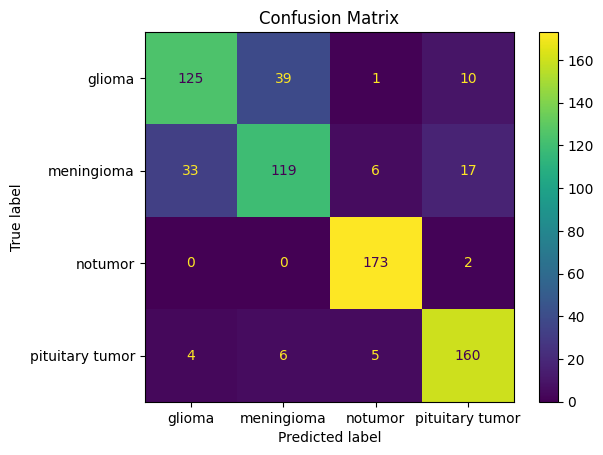





Train
['glioma' 'meningioma' 'notumor' 'pituitary tumor']
                 precision    recall  f1-score   support

         glioma       0.77      0.77      0.77       525
     meningioma       0.76      0.71      0.73       525
        notumor       0.97      0.99      0.98       525
pituitary tumor       0.90      0.95      0.92       525

       accuracy                           0.85      2100
      macro avg       0.85      0.85      0.85      2100
   weighted avg       0.85      0.85      0.85      2100









<Figure size 800x600 with 0 Axes>

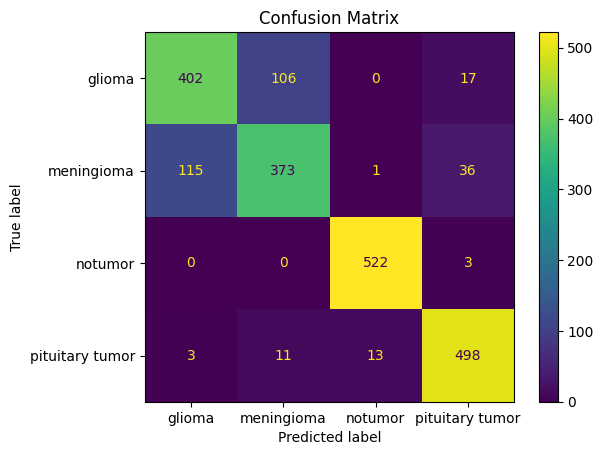

In [ ]:
# Evaluate metrics on test set predictions.
print("Test")
evaluate_metrics(y_pred,y_test)
# Add space for clarity.
print("\n"*3)
# Evaluate metrics on training set predictions.
print("Train")
evaluate_metrics(logitic_regression_ovr.predict(X_train),y_train)

### Common useless features

the features that are not present in all of  the four models , are considered useless

In [ ]:
# Extract the classes from the trained logistic regression model.
classes = logitic_regression_ovr.classes_
# Create a DataFrame using the coefficients of the logistic regression model. Transpose the coefficients so that features are rows and classes are columns.
df_logitic_regression_ovr = pd.DataFrame(logitic_regression_ovr.coef_.T, columns=classes)

In [ ]:
# Filter rows where all coefficients are zero (indicating features that were penalized to zero by LASSO).
selected_rows = df_logitic_regression_ovr[df_logitic_regression_ovr.isin([0]).all(axis=1)]

In [ ]:
# Print the selected rows.
selected_rows

,glioma,meningioma,notumor,pituitary tumor


## **Multinomial LASSO Logistic Regression**

with a linear combination of parameters we evaluate the distribution of every class

In [ ]:
# Define the common parameters for the Multinomial LASSO Logistic Regression.
common_params = {
    'penalty': 'l1',                 # Use L1 regularization (LASSO)
    'random_state': 42,              # Set a seed for reproducibility
    'refit': True,                   # Refit the model with the best parameters after CV
    'multi_class': 'multinomial',    # Specify multinomial logistic regression for multi-class classification
    'solver': "saga",                # Use the 'saga' solver, compatible with L1 penalty
    'cv': 5,                         # Perform 5-fold cross-validation
    'max_iter': 50000                # Set the maximum number of iterations for convergence
}

# Initialize the Multinomial LASSO Logistic Regression with cross-validation (CV). By default, it evaluates regularization strengths (penalties) between 10^-4 and 10^4.
logistic_regression_multinomial = LogisticRegressionCV(n_jobs=-1, **common_params)
# Fit the model to the training data.
logistic_regression_multinomial.fit(X_train, y_train)

# Print the range of regularization strengths evaluated during cross-validation.
print("The penalties evaluated are:", "\n", logistic_regression_multinomial.Cs_)

# Print the best regularization strength for each model.
print("\n", "The bests for every models are:", "\n", logistic_regression_multinomial.C_)

The penalties evaluated are: 
 [1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]

 The bests for every models are: 
 [2.7825594 2.7825594 2.7825594 2.7825594]


Test
['glioma' 'meningioma' 'notumor' 'pituitary tumor']
                 precision    recall  f1-score   support

         glioma       0.76      0.70      0.73       175
     meningioma       0.72      0.72      0.72       175
        notumor       0.96      0.99      0.97       175
pituitary tumor       0.85      0.90      0.87       175

       accuracy                           0.83       700
      macro avg       0.82      0.83      0.83       700
   weighted avg       0.82      0.83      0.83       700









<Figure size 800x600 with 0 Axes>

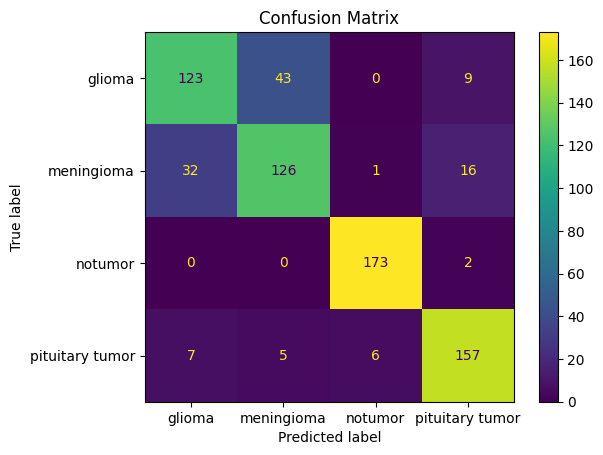





Train
['glioma' 'meningioma' 'notumor' 'pituitary tumor']
                 precision    recall  f1-score   support

         glioma       0.80      0.75      0.77       525
     meningioma       0.75      0.75      0.75       525
        notumor       0.96      0.98      0.97       525
pituitary tumor       0.89      0.94      0.91       525

       accuracy                           0.85      2100
      macro avg       0.85      0.85      0.85      2100
   weighted avg       0.85      0.85      0.85      2100









<Figure size 800x600 with 0 Axes>

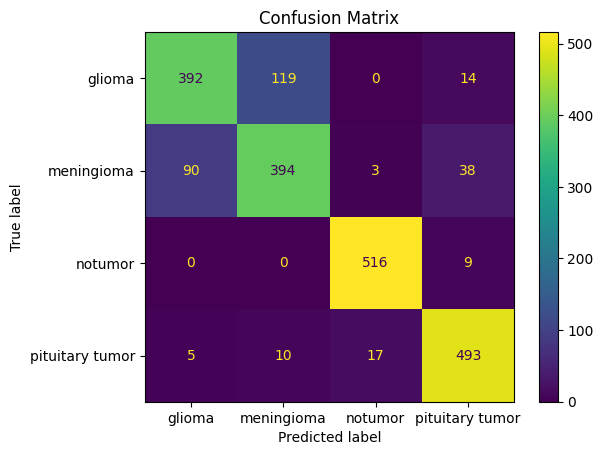

In [ ]:
# Make predictions on the test data using the trained model.
y_pred = logistic_regression_multinomial.predict(X_test)

# Evaluate metrics on test set predictions.
print("Test")
evaluate_metrics(y_pred,y_test)

# Add space for clarity.
print("\n"*3)

# Evaluate metrics on training set predictions.
print("Train")
evaluate_metrics(logistic_regression_multinomial.predict(X_train),y_train)

### Common useless features

In [ ]:
# Extract the classes from the trained multinomial logistic regression model.
classes = logistic_regression_multinomial.classes_
# Create a DataFrame using the coefficients of the logistic regression model. Transpose the coefficients so that features are rows and classes are columns.
df_logistic_regression_multinomial = pd.DataFrame(logistic_regression_multinomial.coef_.T, columns=classes)

In [ ]:
# Filter rows where all coefficients are zero (indicating features that were penalized to zero by LASSO).
selected_rows = df_logistic_regression_multinomial[df_logistic_regression_multinomial.isin([0]).all(axis=1)]

In [ ]:
# Print the selected rows.
selected_rows

,glioma,meningioma,notumor,pituitary tumor


### More influential variables






 The predicted distribution for glioma 



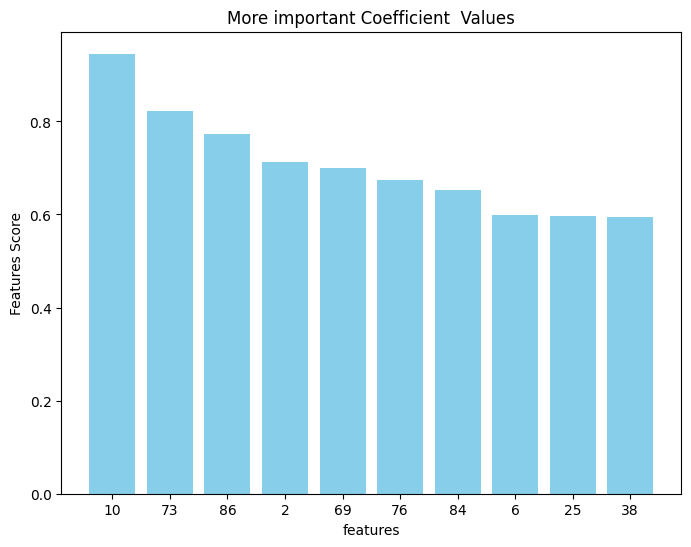






 The predicted distribution for meningioma 



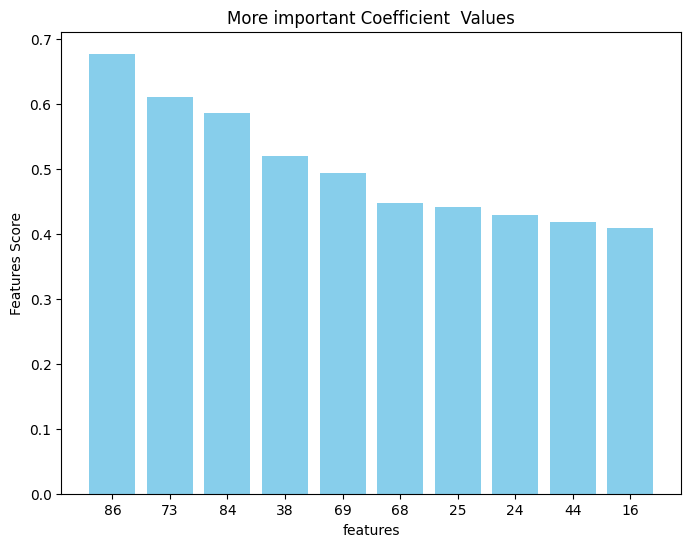






 The predicted distribution for notumor 



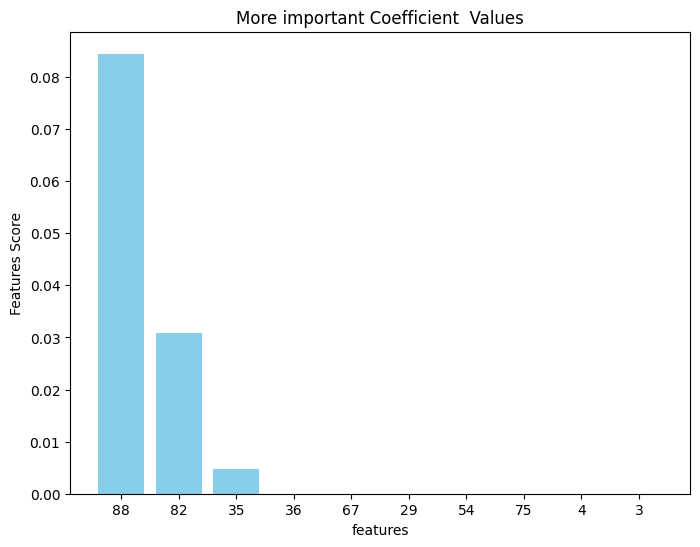






 The predicted distribution for pituitary tumor 



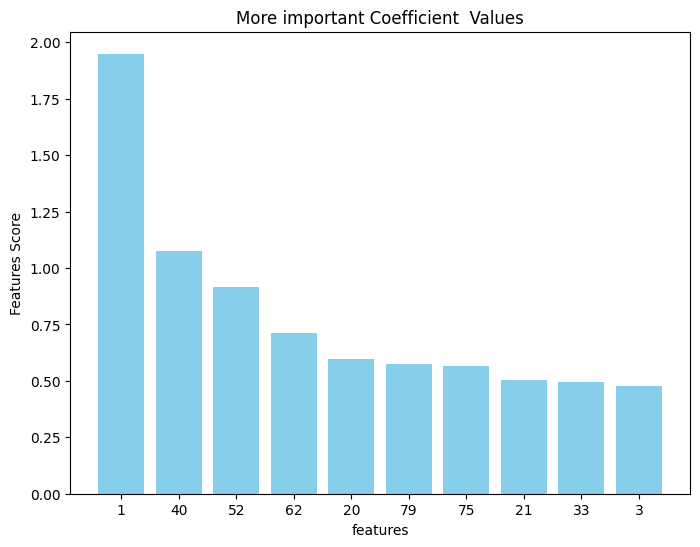

In [ ]:
# Set the number of top features to display.
num_features = 10

# Iterate through each class name in the list of classes.
for name in classes:
    # Sort the coefficients associated with the features for the current class in descending order.
    x = df_logistic_regression_multinomial[name].sort_values(ascending=False)
    # Further sort the coefficients in descending order and retrieve the corresponding feature names.
    important_features = x.sort_values(ascending=False)
    features = important_features.index.astype(str)
    # Print a section header indicating the predicted distribution for the current class.
    print("\n" * 5,"The predicted distribution for", name, "\n")
    # Create a new figure for the bar chart with specified size.
    plt.figure(figsize=(8, 6))
    # Plot a bar chart with the top 'num_features' features and their coefficients.
    plt.bar(features[:num_features], important_features[:num_features], color='skyblue')
    # Set labels for x-axis and y-axis.
    plt.xlabel('features')
    plt.ylabel('Features Score')
    # Set the title of the plot.
    plt.title('More important Coefficient  Values')
    # Display the plot for the current class.
    plt.show()

# **CLASSIFICATION TREE**

## **Hyperparameter Tuning**

In [ ]:
# Define a function to perform hyperparameter tuning of a decision tree classifier.
def tuning_decision_tree(criterion, X_train, y_train, num_fold):

    # BASIC DECISION TREE CLASSIFIER WITH GIVEN CRITERION
    # Initialize the Decision Tree Classifier with the specified criterion (gini or entropy).
    clf = DecisionTreeClassifier(random_state=0, criterion=criterion)

    # COST COMPLEXITY PRUNING
    # Obtain the cost complexity pruning path for the decision tree.
    # This method calculates the effective alphas (ccp_alphas) and corresponding impurities for the training set, which are used for pruning the decision tree.
    path = clf.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities
    # Plot the total impurity of leaves vs the effective alpha to visualize the pruning path.
    fig, ax = plt.subplots()
    ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
    ax.set_xlabel("effective alpha")
    ax.set_ylabel("total impurity of leaves")
    ax.set_title("Total Impurity vs effective alpha for training set")

    # CROSS VALIDATION FOR EACH VALUE OF ALPHA
    # Initialize K-Folds cross-validator with the specified number of folds. In particular, shuffle the data before splitting, ensuring that the data is randomly distributed across the folds.
    kf = KFold(n_splits=num_fold, shuffle=True, random_state=42)
    # Initialize the lists to store the results of the cross-validation for each fold.
    cv_node_counts = []   # to store the number of nodes in the pruned trees
    cv_depth = []         # store the depths of the pruned trees
    cv_train_scores = []  # store the training accuracy scores
    cv_test_scores = []   # store the validation accuracy scores
    #  Iterate over each fold created by the K-Folds cross-validator.
    count = 0
    for train_index, validation_index in kf.split(X_train):
          print(count)
          count = count + 1
          # Within each fold, split the training data into a new training set and a validation set.
          new_X_train, new_y_train = X_train.iloc[train_index], y_train.iloc[train_index]
          X_validation, y_validation = X_train.iloc[validation_index], y_train.iloc[validation_index]
          # Initialize the lists to temporary store the results for each level of alpha within the current fold.
          node_counts = []
          depth = []
          train_scores = []
          test_scores = []
          # Iterate over each alpha value for pruning.
          for ccp_alpha in ccp_alphas:
              # Initialize and train the Decision Tree Classifier with the current alpha value.
              clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
              clf.fit(new_X_train, new_y_train)
              # Record the number of nodes, depth, and accuracy for both training and validation sets.
              node_counts.append(clf.tree_.node_count)
              depth.append(clf.tree_.max_depth)
              train_scores.append(clf.score(new_X_train, new_y_train))
              test_scores.append(clf.score(X_validation, y_validation))
          # Append the results of the current fold to the respective lists.
          cv_node_counts.append(node_counts)
          cv_depth.append(depth)
          cv_train_scores.append(train_scores)
          cv_test_scores.append(test_scores)
    # Convert the lists to numpy arrays for easier manipulation.
    cv_node_counts = np.array(cv_node_counts)
    cv_depth = np.array(cv_depth)
    cv_train_scores= np.array(cv_train_scores)
    cv_test_scores= np.array(cv_test_scores)
    # Compute the mean of the results across all folds.
    cv_node_counts = np.mean(cv_node_counts, axis=0)
    cv_depth = np.mean(cv_depth, axis=0)
    cv_train_scores = np.mean(cv_train_scores, axis=0)
    cv_test_scores = np.mean(cv_test_scores, axis=0)

    # PLOTS
    # Plot the number of nodes and depth vs alpha values.
    fig, ax = plt.subplots(2, 1)
    ax[0].plot(ccp_alphas,cv_node_counts , marker="o", drawstyle="steps-post")
    ax[0].set_xlabel("alpha")
    ax[0].set_ylabel("number of nodes")
    ax[0].set_title("Number of nodes vs alpha")
    ax[1].plot(ccp_alphas, cv_depth, marker="o", drawstyle="steps-post")
    ax[1].set_xlabel("alpha")
    ax[1].set_ylabel("depth of tree")
    ax[1].set_title("Depth vs alpha")
    fig.tight_layout()
    # Plot the accuracy for training and validation sets vs alpha values.
    fig, ax = plt.subplots()
    ax.set_xlabel("alpha")
    ax.set_ylabel("accuracy")
    ax.set_title("Accuracy vs alpha for training and testing sets")
    ax.plot(ccp_alphas,cv_train_scores, label="train")
    ax.plot(ccp_alphas,cv_test_scores , label="test")
    ax.legend()
    plt.show()

    # RETURN
    # Return the mean results across all folds for further analysis.
    return cv_node_counts, cv_depth, cv_train_scores, cv_test_scores, ccp_alphas

### Entropy

In [ ]:
# Define the splitting criterion for the decision tree.
criterion = "entropy"

# Set the number of folds for cross-validation.
num_fold = 10

0
1
2
3
4
5
6
7
8
9


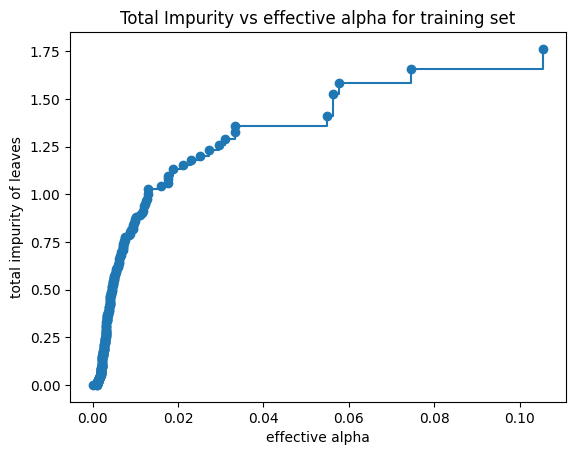

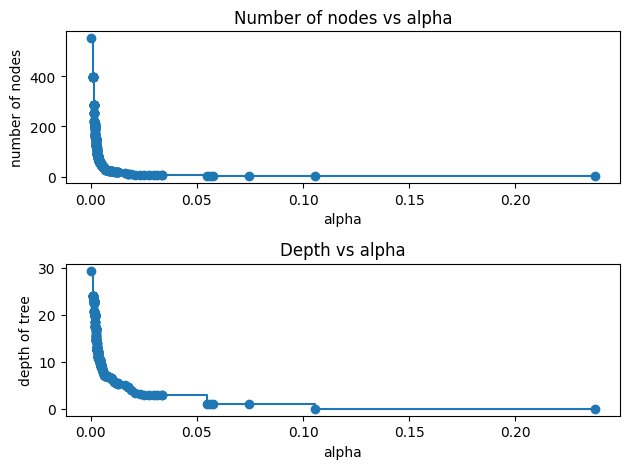

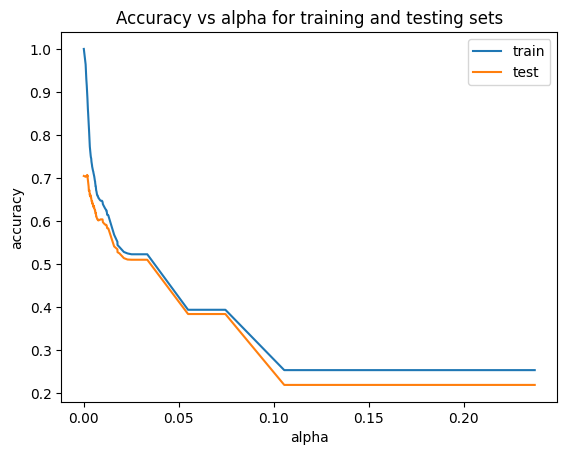

In [ ]:
# Perform hyperparameter tuning of the Decision Tree Classifier using the specified criterion and number of folds.
cv_node_counts_entropy, cv_depth_entropy, cv_train_scores_entropy, cv_test_scores_entropy, ccp_alphas_entropy = tuning_decision_tree(criterion, X_train, y_train, num_fold)
# The function returns arrays containing:
# - cv_node_counts_entropy: Average number of nodes in the tree across folds
# - cv_depth_entropy: Average depth of the tree across folds
# - cv_train_scores_entropy: Training accuracy scores across folds
# - cv_test_scores_entropy: Validation accuracy scores across folds
# - ccp_alphas_entropy: Cost complexity pruning alphas evaluated

In [ ]:
# Find the maximum accuracy score from the cross-validation test score.
max_score = np.max(cv_test_scores_entropy)
# Print the best accuracy score.
print("The best accuracy is", max_score)
# Find the index of the maximum accuracy score.
index_max = np.argmax(cv_test_scores_entropy)
# Retrieve the corresponding alpha value that yielded the highest accuracy.
best_alpha_entropy = ccp_alphas_entropy[index_max]
# Print the best alpha value associated with the highest accuracy.
print("with an alpha value of", ccp_alphas_entropy[index_max])

The best accuracy is 0.7071428571428572
with the an alpha value of 0.001778732139766473


### Gini

In [ ]:
# Define the splitting criterion for the decision tree.
criterion = "gini"
# Set the number of folds for cross-validation.
num_fold= 10

0
1
2
3
4
5
6
7
8
9


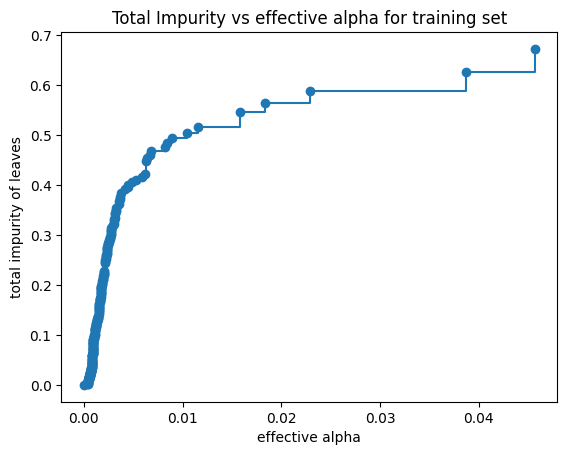

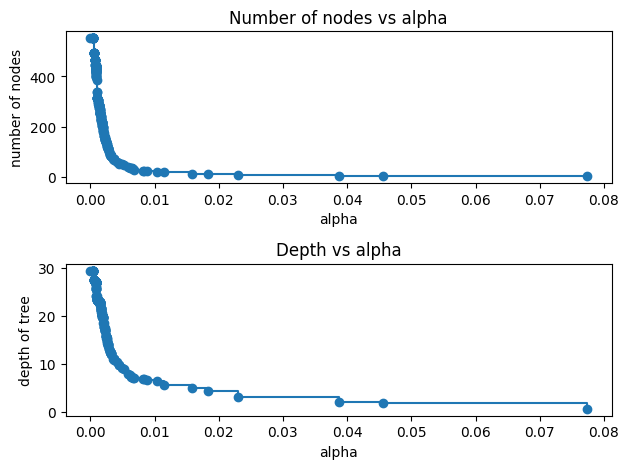

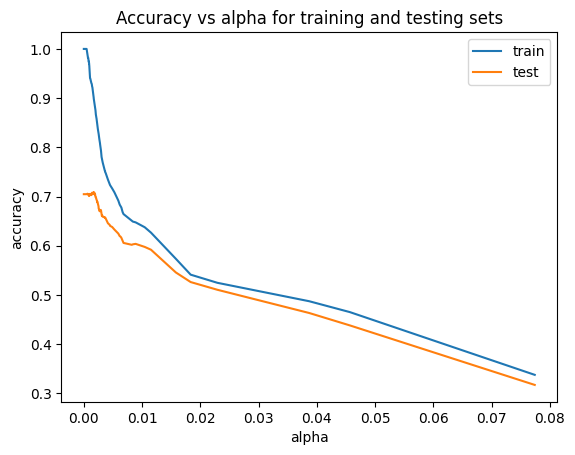

In [ ]:
# Perform hyperparameter tuning of the Decision Tree Classifier using the specified criterion and number of folds.
cv_node_counts_gini, cv_depth_gini, cv_train_scores_gini, cv_test_scores_gini, ccp_alphas_gini = tuning_decision_tree(criterion, X_train, y_train, num_fold)
# The function returns arrays containing:
# - cv_node_counts_gini: Average number of nodes in the tree across folds
# - cv_depth_gini: Average depth of the tree across folds
# - cv_train_scores_gini: Training accuracy scores across folds
# - cv_test_scores_gini: Validation accuracy scores across folds
# - ccp_alphas_gini: Cost complexity pruning alphas evaluated

In [ ]:
# Find the maximum accuracy score from the cross-validation test score.
max_score = np.max(cv_test_scores_gini)
# Print the best accuracy score.
print("The best accuracy is", max_score)
# Find the index of the maximum accuracy score.
index_max = np.argmax(cv_test_scores_gini)
# Retrieve the corresponding alpha value that yielded the highest accuracy.
best_alpha_gini = ccp_alphas_entropy[index_max]
# Print the best alpha value associated with the highest accuracy.
print("with an alpha value of", best_alpha_gini)

The best accuracy is 0.7085714285714286
with an alpha value of 0.003935553574519241


## **Final Model**

In [ ]:
# Initialize the Decision Tree Classifier with the alpha value that yielded the highest accuracy between entropy and giny criteria.
alpha = best_alpha_gini
clf = DecisionTreeClassifier(criterion = "gini", ccp_alpha = alpha, random_state=112)
# Train the classifier on the training data.
clf.fit(X_train, y_train)
# Make predictions on the test data.
y_pred = clf.predict(X_test)

Test
['glioma' 'meningioma' 'notumor' 'pituitary tumor']
                 precision    recall  f1-score   support

         glioma       0.50      0.51      0.51       175
     meningioma       0.45      0.47      0.46       175
        notumor       0.89      0.84      0.86       175
pituitary tumor       0.71      0.70      0.71       175

       accuracy                           0.63       700
      macro avg       0.64      0.63      0.63       700
   weighted avg       0.64      0.63      0.63       700









<Figure size 800x600 with 0 Axes>

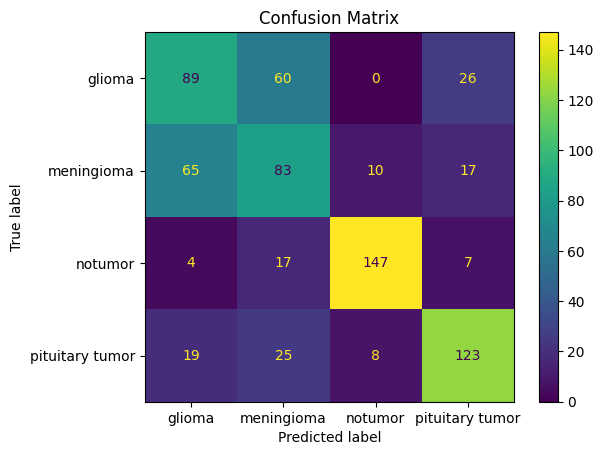





Train
['glioma' 'meningioma' 'notumor' 'pituitary tumor']
                 precision    recall  f1-score   support

         glioma       0.63      0.58      0.60       525
     meningioma       0.54      0.61      0.58       525
        notumor       0.96      0.88      0.92       525
pituitary tumor       0.77      0.81      0.79       525

       accuracy                           0.72      2100
      macro avg       0.73      0.72      0.72      2100
   weighted avg       0.73      0.72      0.72      2100









<Figure size 800x600 with 0 Axes>

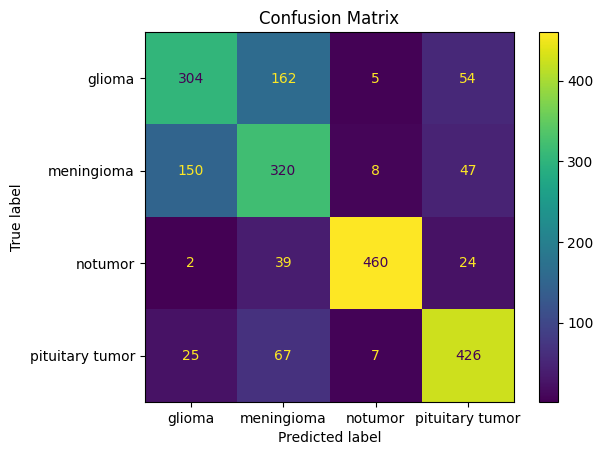

In [ ]:
# Evaluate and print the performance metrics of the model on the test set predictions.
print("Test")
evaluate_metrics(y_pred,y_test)
# Add space for clarity.
print("\n"*3)
# Evaluate and print the performance metrics of the model on training set predictions.
print("Train")
evaluate_metrics(clf.predict(X_train),y_train)

[Text(0.6620370370370371, 0.95, 'x[40] <= 0.015\nsamples = 100.0%\nvalue = [0.25, 0.25, 0.25, 0.25]\nclass = notumor'),
 Text(0.4722222222222222, 0.85, 'x[25] <= 1.17\nsamples = 55.4%\nvalue = [0.376, 0.373, 0.134, 0.117]\nclass = notumor'),
 Text(0.3148148148148148, 0.75, 'x[25] <= 0.0\nsamples = 40.8%\nvalue = [0.294, 0.396, 0.18, 0.13]\nclass = glioma'),
 Text(0.2222222222222222, 0.65, 'x[79] <= 3.492\nsamples = 23.3%\nvalue = [0.352, 0.468, 0.031, 0.149]\nclass = glioma'),
 Text(0.18518518518518517, 0.55, 'x[1] <= 0.931\nsamples = 22.5%\nvalue = [0.36, 0.485, 0.032, 0.123]\nclass = glioma'),
 Text(0.14814814814814814, 0.45, 'x[15] <= 0.302\nsamples = 21.4%\nvalue = [0.372, 0.503, 0.033, 0.091]\nclass = glioma'),
 Text(0.1111111111111111, 0.35, 'x[33] <= 1.253\nsamples = 18.1%\nvalue = [0.318, 0.538, 0.039, 0.105]\nclass = glioma'),
 Text(0.07407407407407407, 0.25, 'x[73] <= 3.261\nsamples = 17.0%\nvalue = [0.305, 0.569, 0.042, 0.084]\nclass = glioma'),
 Text(0.037037037037037035, 0

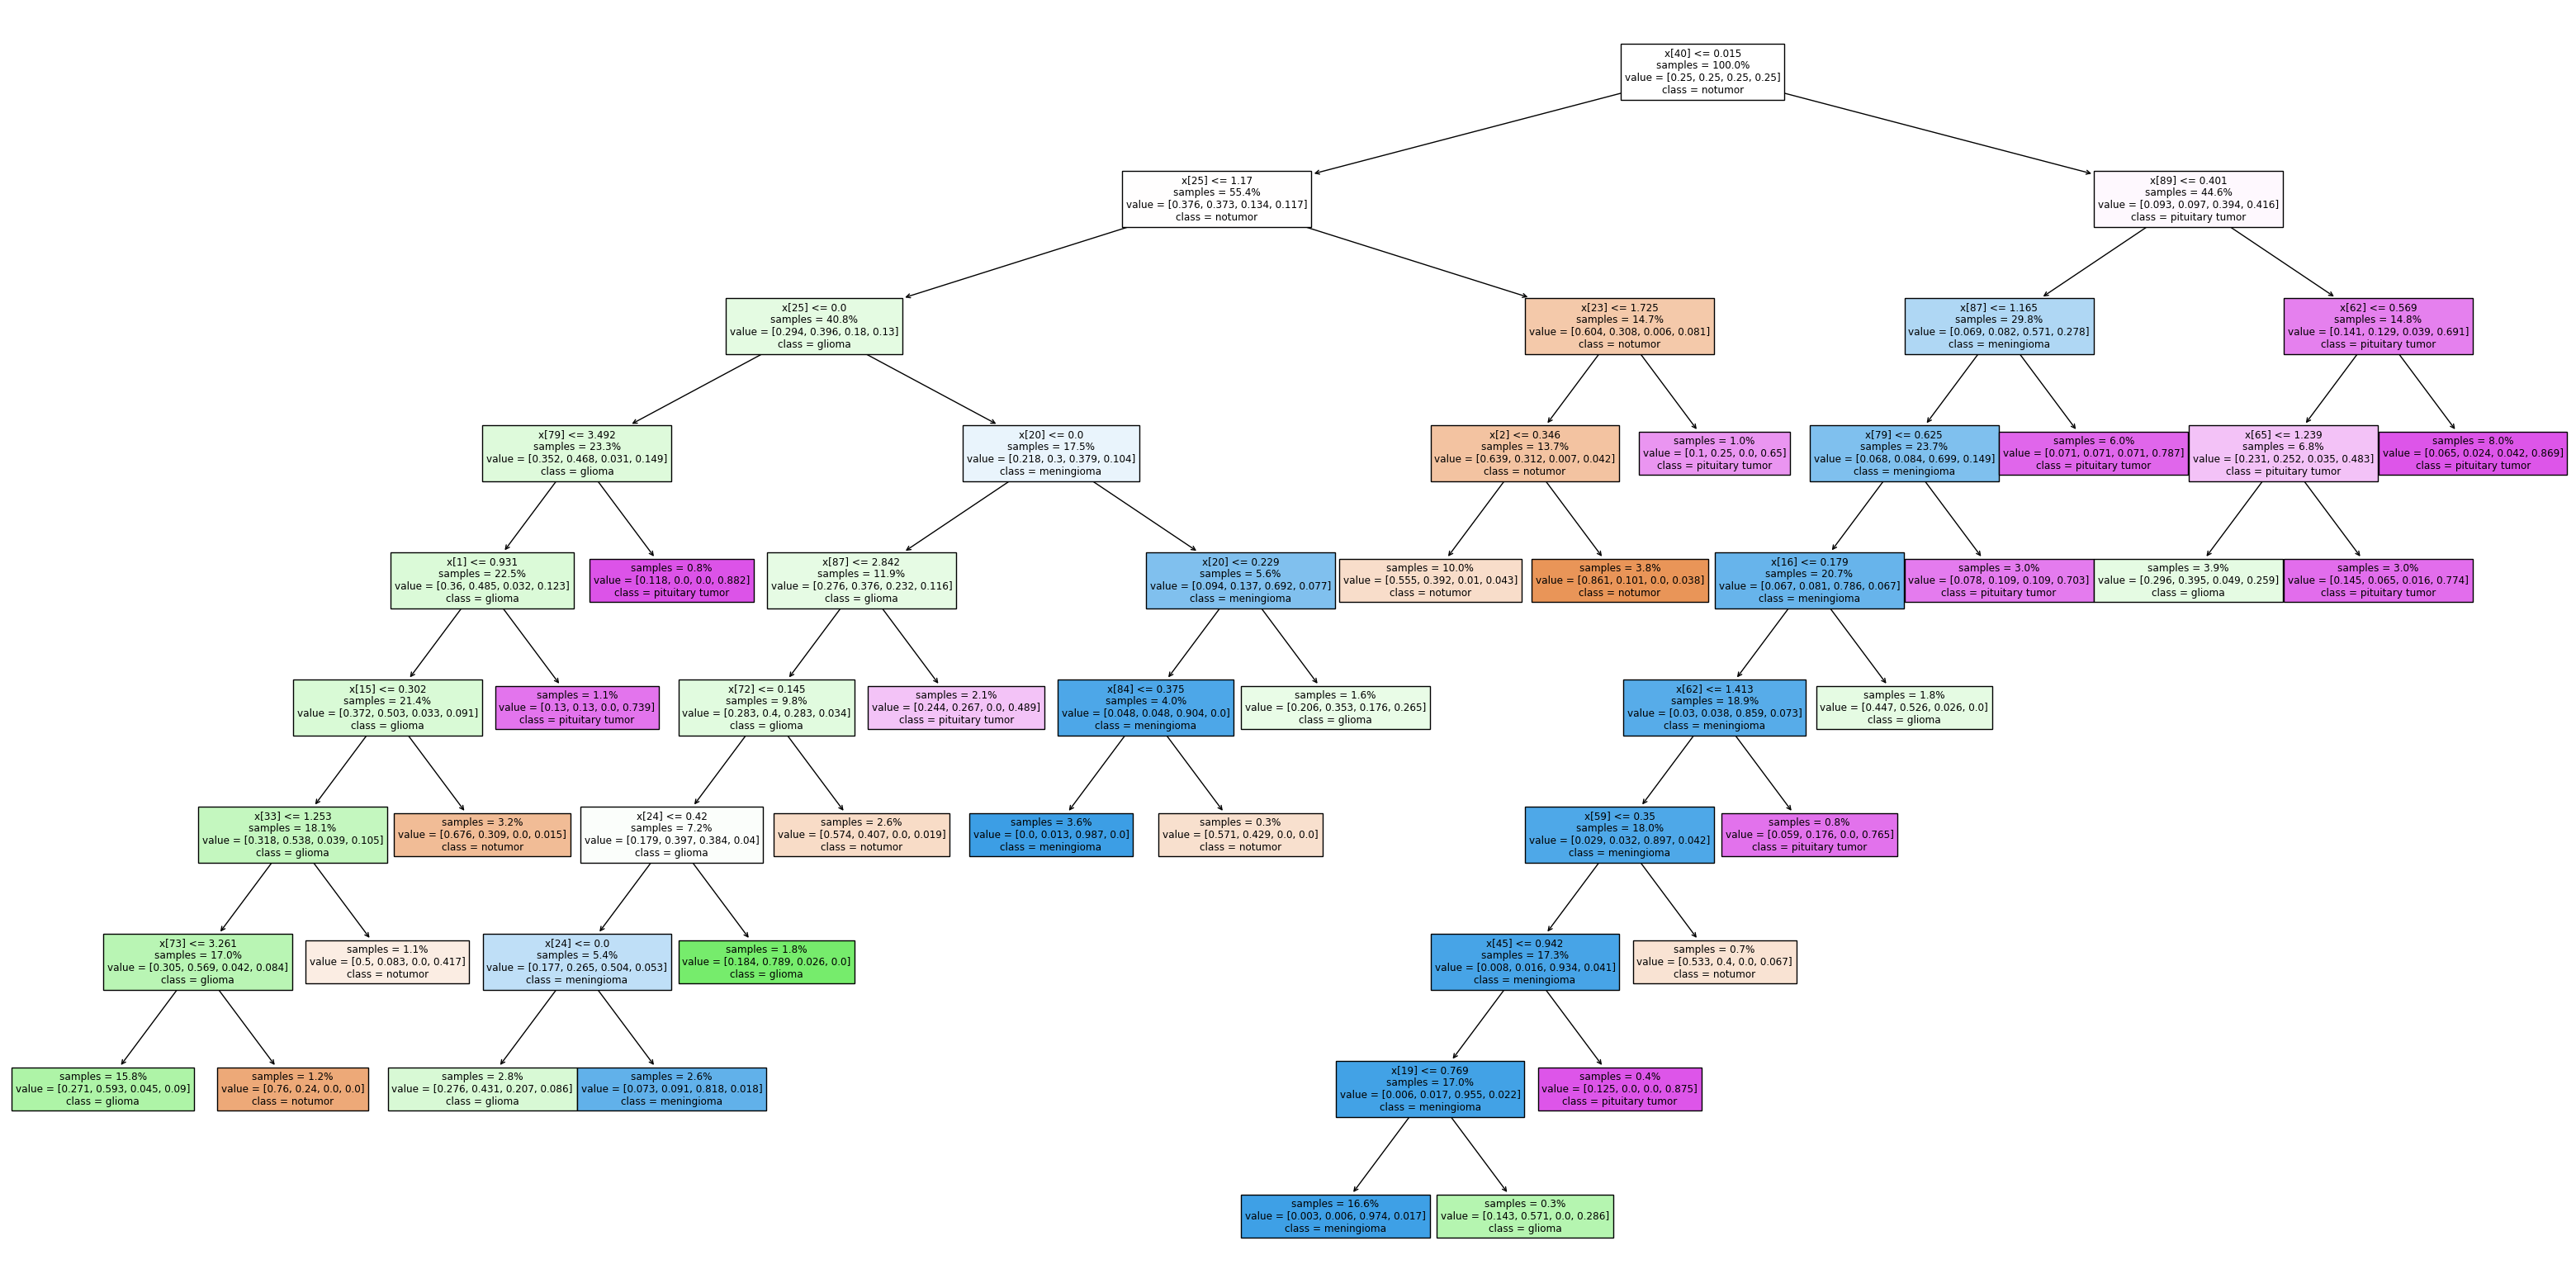

In [ ]:
# Plot the classification tree.
plt.figure(figsize=(40, 20))
tree.plot_tree(clf, class_names=labels, proportion = True, filled = True, impurity = False)

## **Trade-off**

In [ ]:
# Initialize the Decision Tree Classifier with max_depth = 4.
clf = DecisionTreeClassifier(criterion = "gini", max_depth = 4, random_state=8)
# Train the classifier on the training data.
clf.fit(X_train, y_train)
# Make predictions on the test data.
y_pred = clf.predict(X_test)

Test
['glioma' 'meningioma' 'notumor' 'pituitary tumor']
                 precision    recall  f1-score   support

         glioma       0.58      0.35      0.43       175
     meningioma       0.44      0.70      0.54       175
        notumor       0.78      0.79      0.79       175
pituitary tumor       0.76      0.59      0.66       175

       accuracy                           0.61       700
      macro avg       0.64      0.61      0.60       700
   weighted avg       0.64      0.61      0.60       700









<Figure size 800x600 with 0 Axes>

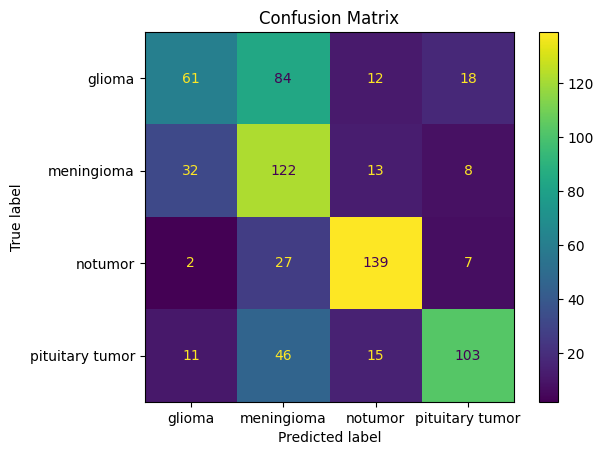





Train
['glioma' 'meningioma' 'notumor' 'pituitary tumor']
                 precision    recall  f1-score   support

         glioma       0.64      0.36      0.46       525
     meningioma       0.45      0.69      0.54       525
        notumor       0.77      0.80      0.78       525
pituitary tumor       0.83      0.70      0.76       525

       accuracy                           0.64      2100
      macro avg       0.67      0.64      0.64      2100
   weighted avg       0.67      0.64      0.64      2100









<Figure size 800x600 with 0 Axes>

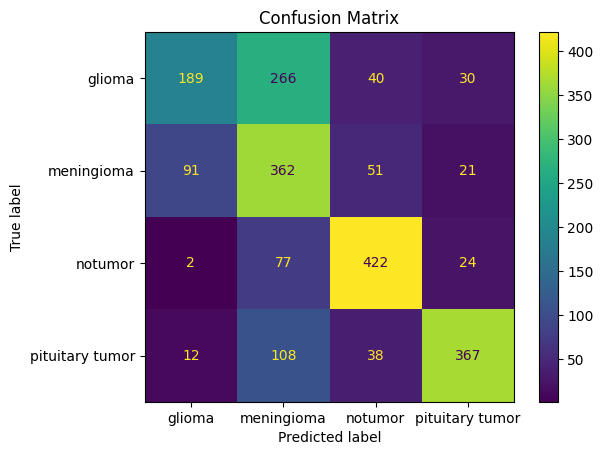

In [ ]:
# Evaluate and print the performance metrics of the model on the test set predictions.
print("Test")
evaluate_metrics(y_pred,y_test)
# Add space for clarity.
print("\n"*3)
# Evaluate and print the performance metrics of the model on training set predictions.
print("Train")
evaluate_metrics(clf.predict(X_train),y_train)

[Text(0.5, 0.9, 'x[40] <= 0.015\nsamples = 100.0%\nvalue = [0.25, 0.25, 0.25, 0.25]\nclass = notumor'),
 Text(0.25, 0.7, 'x[25] <= 1.17\nsamples = 55.4%\nvalue = [0.376, 0.373, 0.134, 0.117]\nclass = notumor'),
 Text(0.125, 0.5, 'x[25] <= 0.0\nsamples = 40.8%\nvalue = [0.294, 0.396, 0.18, 0.13]\nclass = glioma'),
 Text(0.0625, 0.3, 'x[79] <= 3.492\nsamples = 23.3%\nvalue = [0.352, 0.468, 0.031, 0.149]\nclass = glioma'),
 Text(0.03125, 0.1, 'samples = 22.5%\nvalue = [0.36, 0.485, 0.032, 0.123]\nclass = glioma'),
 Text(0.09375, 0.1, 'samples = 0.8%\nvalue = [0.118, 0.0, 0.0, 0.882]\nclass = pituitary tumor'),
 Text(0.1875, 0.3, 'x[20] <= 0.0\nsamples = 17.5%\nvalue = [0.218, 0.3, 0.379, 0.104]\nclass = meningioma'),
 Text(0.15625, 0.1, 'samples = 11.9%\nvalue = [0.276, 0.376, 0.232, 0.116]\nclass = glioma'),
 Text(0.21875, 0.1, 'samples = 5.6%\nvalue = [0.094, 0.137, 0.692, 0.077]\nclass = meningioma'),
 Text(0.375, 0.5, 'x[23] <= 1.725\nsamples = 14.7%\nvalue = [0.604, 0.308, 0.006, 0.0

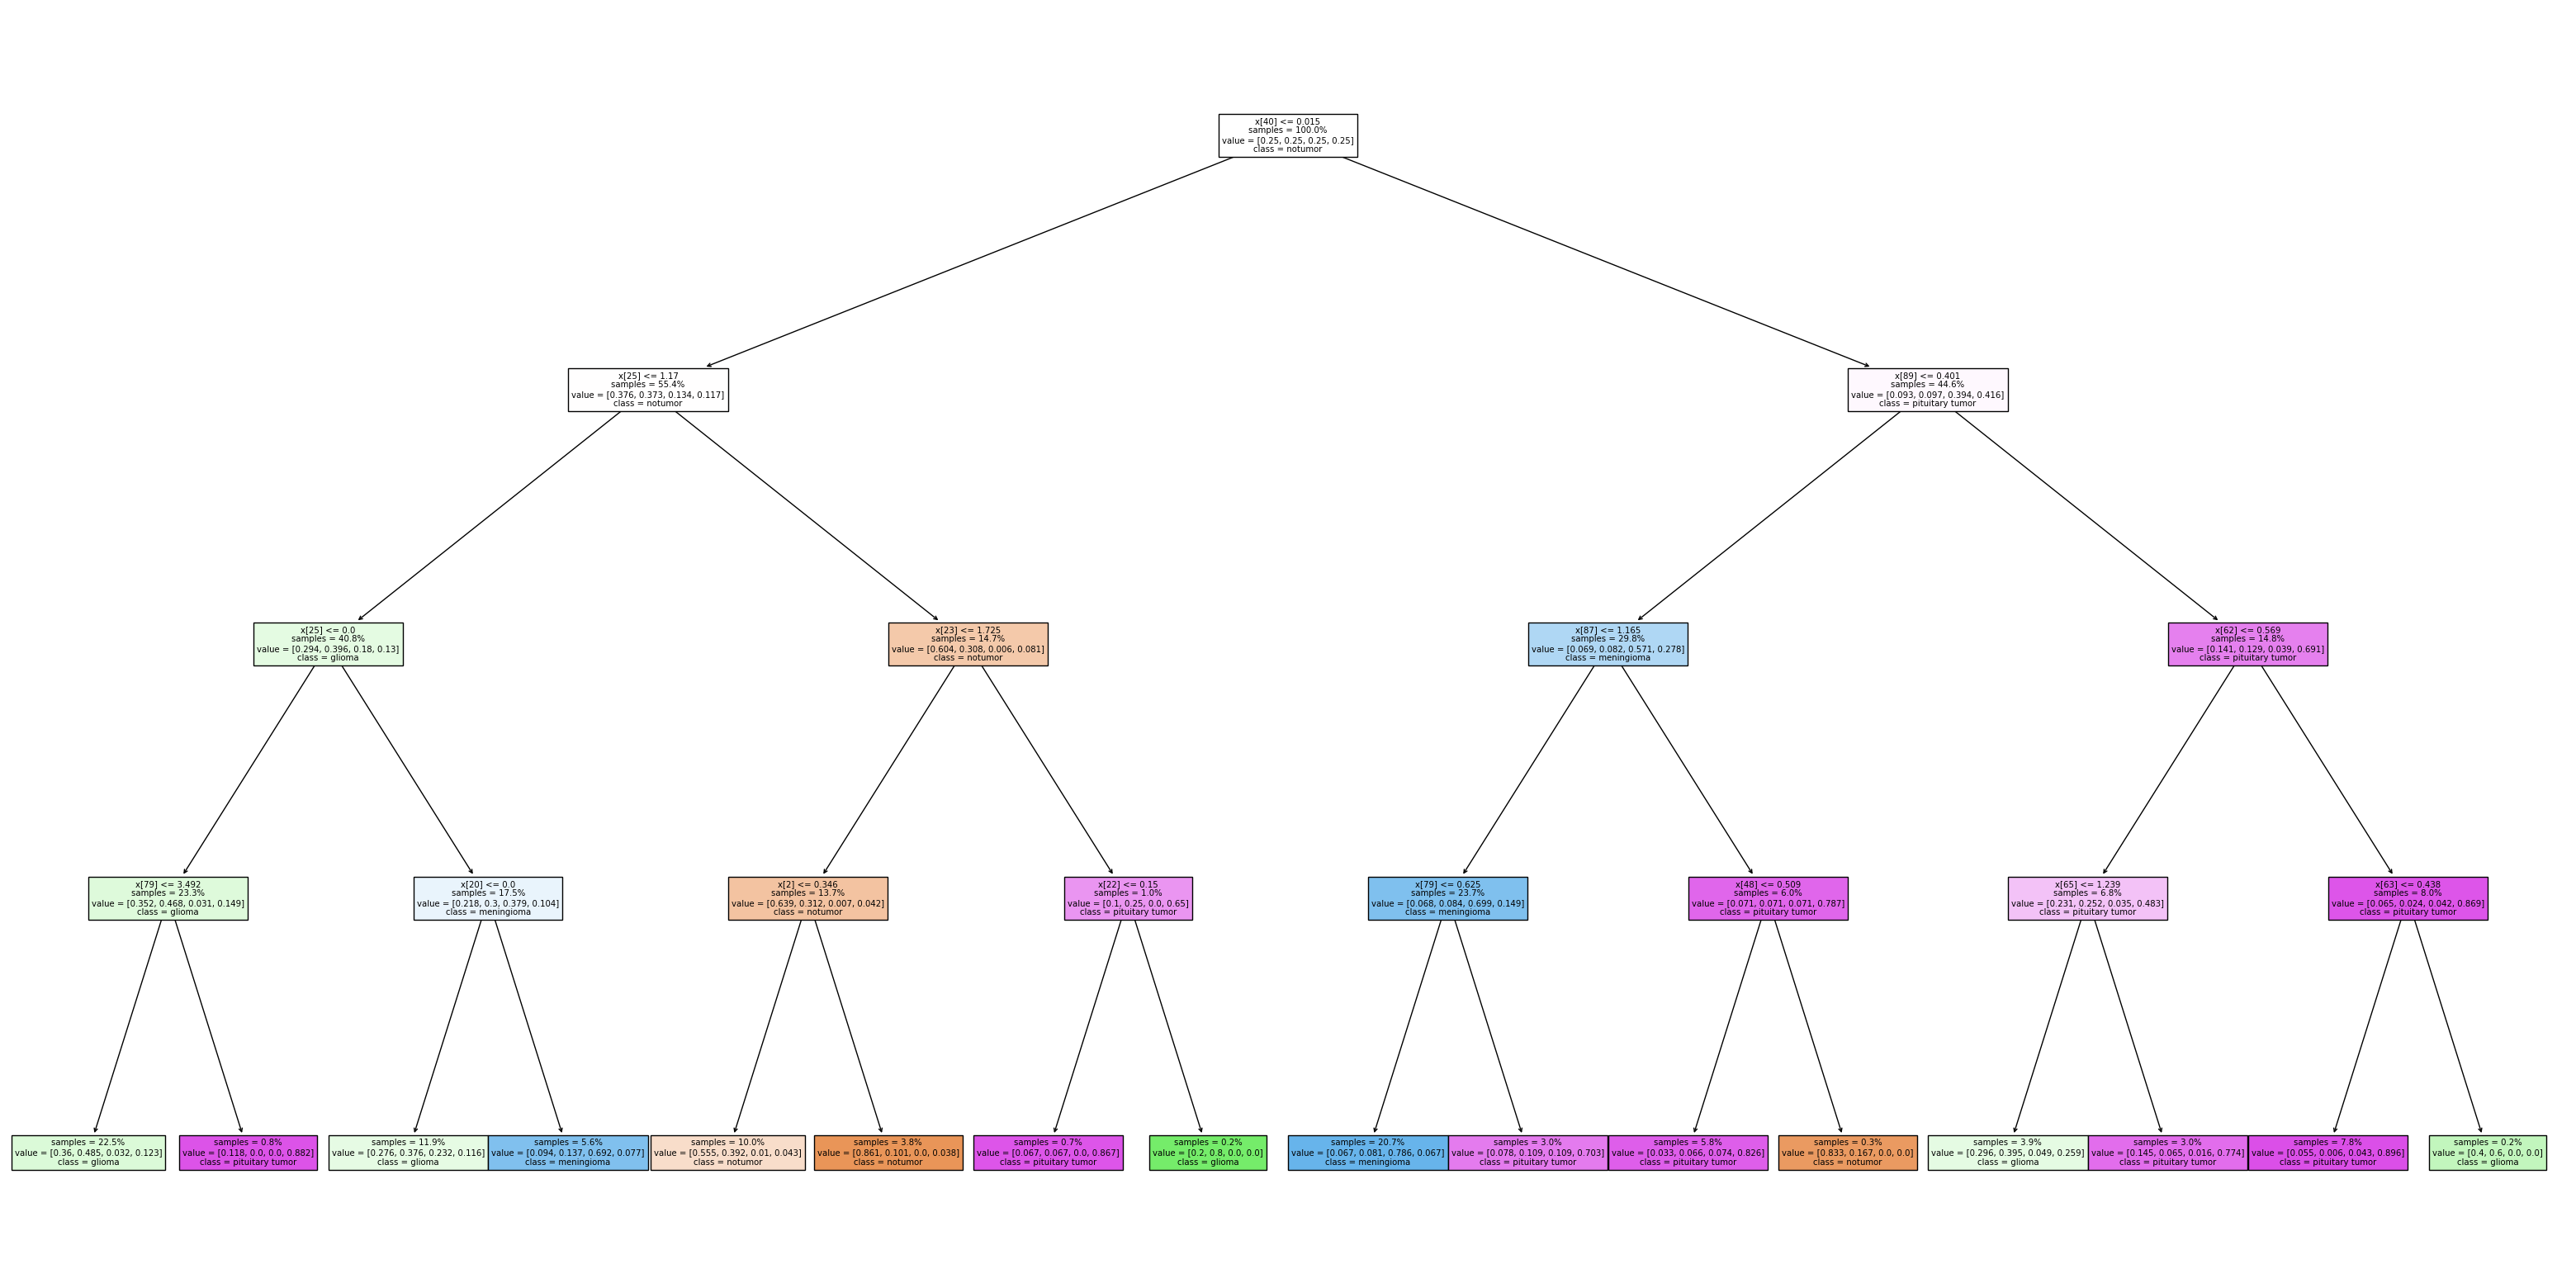

In [ ]:
# Plot the classification tree.
plt.figure(figsize=(40, 20))
tree.plot_tree(clf, class_names=labels, proportion = True, filled = True, impurity = False)

## **Analysis of results**

In [ ]:
features = np.load("/content/drive/MyDrive/ProgettoDataMining/H.npy")

In [ ]:
index_col = [2, 23, 25, 40, 79, 87, 89]

High Precision: High precision is important when the goal is to minimize the number of false positives. In this case, the risk of mistakenly diagnosing healthy people as sick is reduced, avoiding unnecessary anxiety and costs for further tests.

High Recall: High recall is crucial when the goal is to minimize the number of false negatives. In this case, the risk of failing to diagnose actually sick people is reduced, which is particularly important for serious diseases like cancer, where early diagnosis can be vital for survival.


In [ ]:
size = (150,150)
images = {}

for i in index_col:
  image = features[i,:]
  image = image.reshape(size)
  images[i] = image

In [ ]:
## good result about 70 per cent of recall for notumor and meningioma
notumor_comb = [(2,"high"),(23,"low"),(25,"high"), (40,"low")]
meningioma_comb = [(79,"low"), (87,"low"), (89,"low"), (40,"high")]

In [ ]:
def show_results(combination, dictionary_of_image):
  for i in combination:
    print("Value", i[1])
    image = dictionary_of_image[i[0]]
    plt.imshow(image, cmap="gray")
    plt.show()

Value high


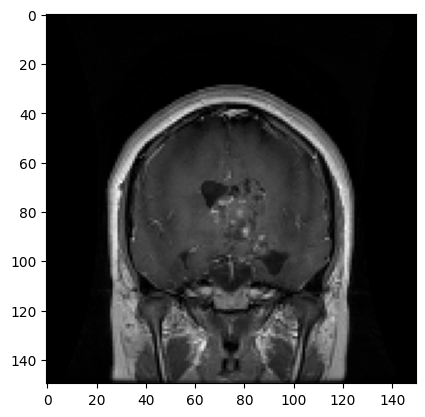

Value low


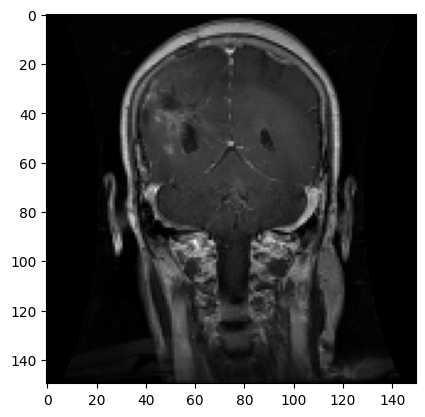

Value high


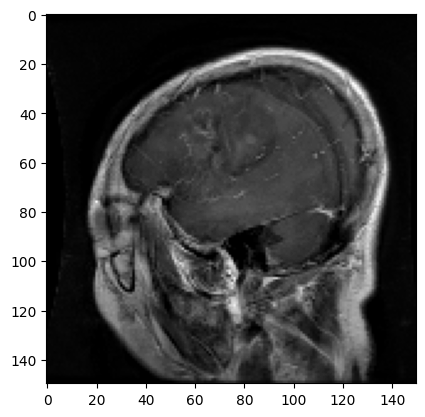

Value low


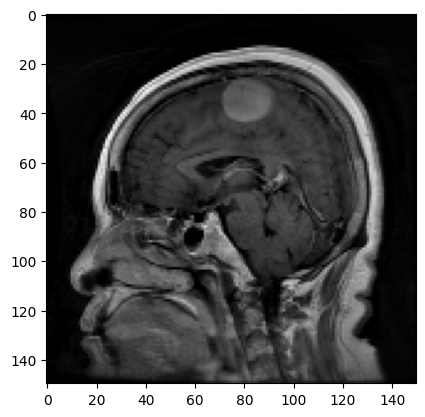

In [ ]:
show_results(notumor_comb, images)

Value low


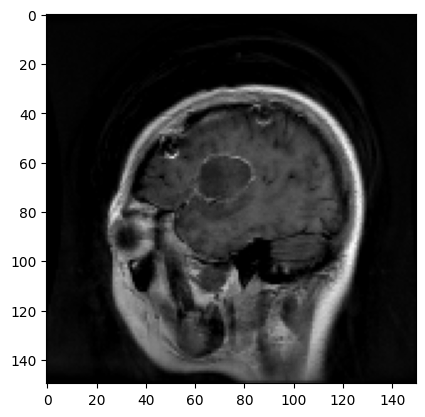

Value low


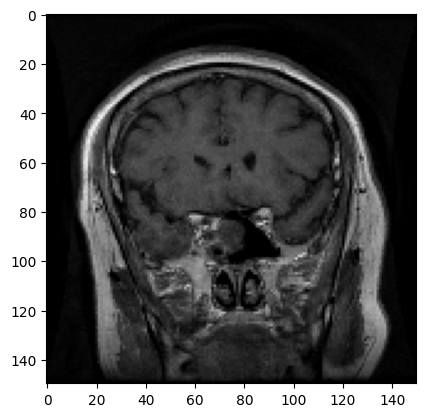

Value low


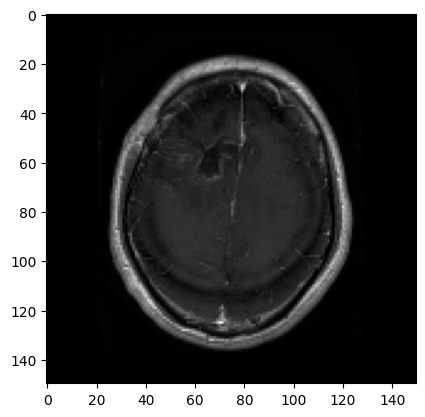

Value high


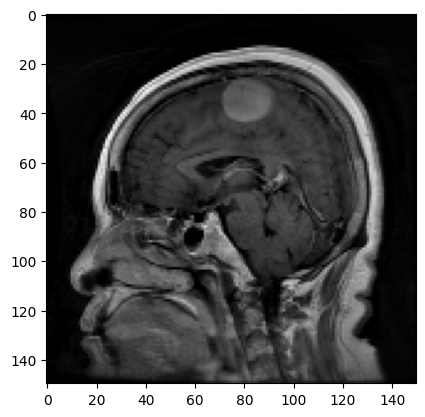

In [ ]:
show_results(meningioma_comb,images)

# **RANDOM FOREST**

## **Hyperparameter Tuning**


In [ ]:
# Initialize the Random Forest Classifier.
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Define the parameter grid for hyperparameter tuning.
params = {
    'max_depth': [10,12,15,20],                 # Maximum depth of the tree
    'min_samples_leaf': [5, 10, 20, 50],        # Minimum number of samples required to be at a leaf node
    'n_estimators': [200,400,600],              # Number of trees in the forest
    'criterion': ["gini"],                      # Criterion to measure the quality of a split
    'max_features': ["sqrt", "log2", None]      # Number of features to consider when looking for the best split
}

# Configure GridSearchCV to perform the hyperparameter tuning.
grid_search = GridSearchCV(estimator=rf,        # The Random Forest model
                           param_grid=params,   # The grid of hyperparameters
                           cv = 10,             # Number of folds for cross-validation
                           n_jobs=-1,           # Use all available cores for parallel processing
                           verbose=1,           # Increase verbosity to see the progress
                           scoring="accuracy",  # Metric to evaluate the model
                           refit= True)         # Refit the best model on the whole dataset

# Fit the GridSearchCV model to the training data.
# This will:
# - Train the model for each combination of hyperparameters
# - Perform 10-fold cross-validation for each combination
# - Calculate the average accuracy for each combination
# - Identify the combination with the highest average accuracy
# - Refit the best model on the entire training set
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [10, 12, 15, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [200, 400, 600]},
             scoring='accuracy', verbose=1)

In [ ]:
# Print the best score (accuracy) achieved during the grid search.
print("Best score", grid_search.best_score_)
# Retrieve the best model with the optimal hyperparameters.
model = grid_search.best_estimator_

Best score 0.8047619047619048


In [ ]:
# Print the parameters of this best model.
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Store the parameters of the best model.
par = model.get_params()

In [ ]:
# Make predictions on the test data.
y_pred = model.predict(X_test)

Test
['glioma' 'meningioma' 'notumor' 'pituitary tumor']
                 precision    recall  f1-score   support

         glioma       0.74      0.61      0.67       175
     meningioma       0.70      0.76      0.73       175
        notumor       0.97      0.98      0.97       175
pituitary tumor       0.81      0.87      0.84       175

       accuracy                           0.81       700
      macro avg       0.80      0.81      0.80       700
   weighted avg       0.80      0.81      0.80       700









<Figure size 800x600 with 0 Axes>

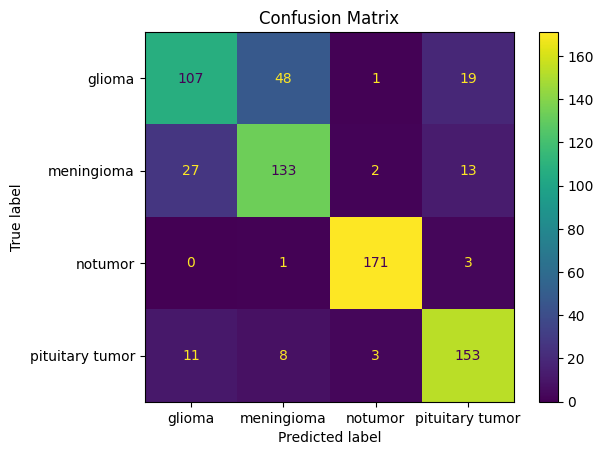





Train
['glioma' 'meningioma' 'notumor' 'pituitary tumor']
                 precision    recall  f1-score   support

         glioma       0.98      0.93      0.95       525
     meningioma       0.93      0.96      0.95       525
        notumor       0.99      1.00      0.99       525
pituitary tumor       0.94      0.95      0.94       525

       accuracy                           0.96      2100
      macro avg       0.96      0.96      0.96      2100
   weighted avg       0.96      0.96      0.96      2100









<Figure size 800x600 with 0 Axes>

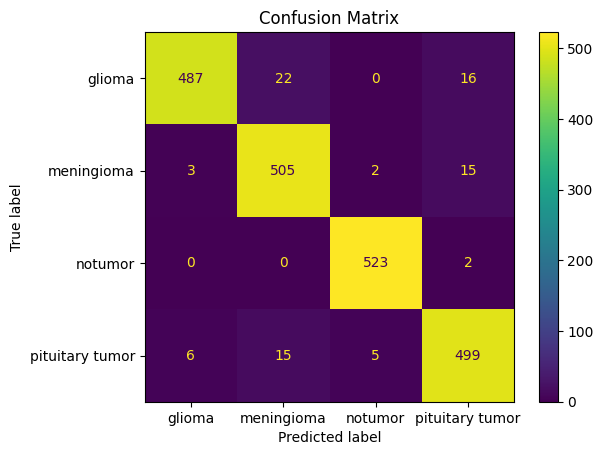

In [ ]:
# Evaluate and print the performance metrics of the model on the test set predictions.
print("Test")
evaluate_metrics(y_pred,y_test)
# Add space for clarity.
print("\n"*3)
# Evaluate and print the performance metrics of the model on the training set predictions.
print("Train")
evaluate_metrics(model.predict(X_train),y_train)

In [ ]:
# Get the feature importances from the best model.
importances = model.feature_importances_
# Get the feature names from the training data.
feature_names = X_train.columns
# Ensure feature names are strings.
feature_names=feature_names.astype(str)
# Create a DataFrame to hold feature names and their importances.
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# Sort the DataFrame by the importance values in descending order.
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
# Specify the number of top features to display.
num_to_show = 25
# Select the top 'num_to_show' features from the DataFrame.
z = feature_importance_df.iloc[:num_to_show,:]

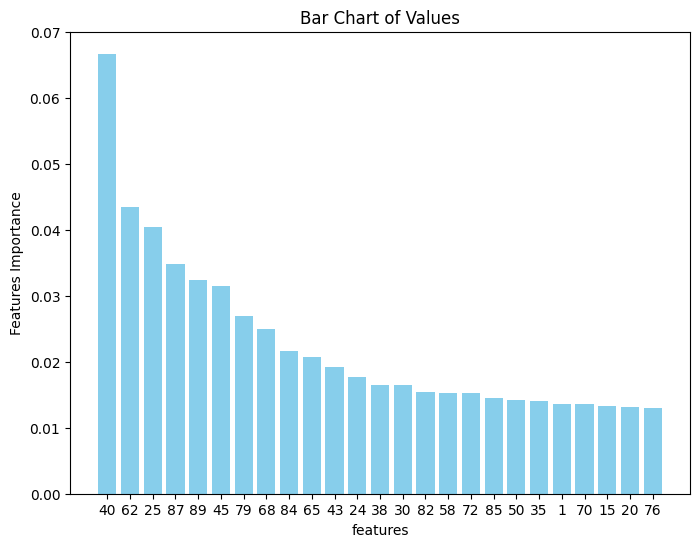

In [ ]:
# Create a bar plot of the top feature importances.
plt.figure(figsize=(8, 6))
plt.bar(z['Feature'], z['Importance'], color='skyblue')
plt.xlabel('features')
plt.ylabel('Features Importance')
plt.title('Bar Chart of Values')
plt.show()

## **Recursive Feature Elimination (RFE)**



In [ ]:
# Initialize RFECV with the specified parameters (use the best Random Forest model as estimator and remove 1 feature at a time at each iteration).
rfe = RFECV(model, cv=5, min_features_to_select = 5, step=1, n_jobs= -1)
# Fit RFECV to the training data to perform feature selection.
rfe.fit(X_train, y_train)

RFECV(cv=5,
      estimator=RandomForestClassifier(max_depth=12, min_samples_leaf=5,
                                       n_estimators=200, n_jobs=-1,
                                       random_state=42),
      min_features_to_select=5, n_jobs=-1)

In [ ]:
# Get and print the optimal number of features determined by RFECV.
best_number = rfe.n_features_
print('Optimal number of features: %d' % rfe.n_features_)

Optimal number of features: 89


In [ ]:
# Retrieve the cross-validation results from RFECV.
result = rfe.cv_results_

In [ ]:
# Extract the mean test scores for each feature set.
r = result['mean_test_score']

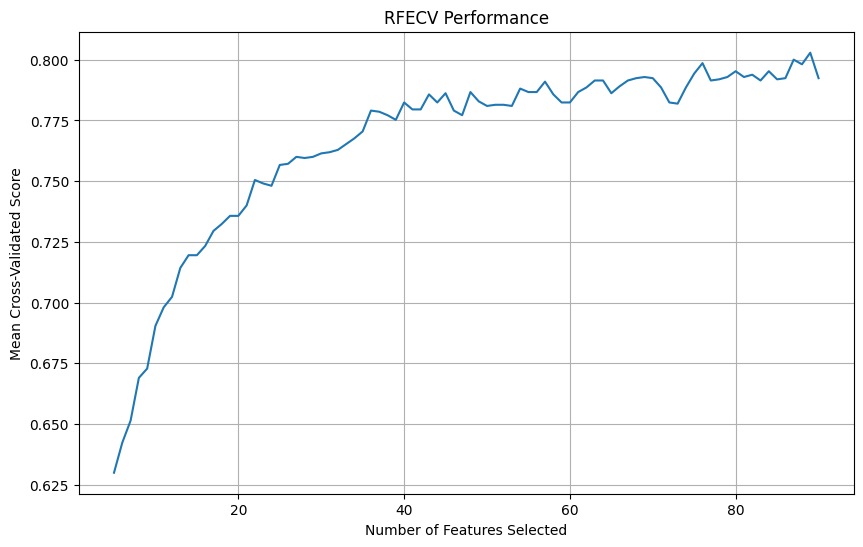

In [ ]:
# Create a figure for plotting.
plt.figure(figsize=(10, 6))
# Plot the mean test scores against the number of features selected. The range starts from 5 because min_features_to_select is set to 5.
plt.plot(range(5, len(r) + 5), r)
plt.xlabel('Number of Features Selected')
plt.ylabel('Mean Cross-Validated Score')
plt.title('RFECV Performance')
plt.grid(True)
plt.show()

In [ ]:
# Initialize RFE with the specified parameters (use the best Random Forest model as estimator and select 8 features).
rfe_new = RFE(model, n_features_to_select=8)
# Fit RFE to the training data to perform feature selection.
rfe_new.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(max_depth=12, min_samples_leaf=5,
                                     n_estimators=200, n_jobs=-1,
                                     random_state=42),
    n_features_to_select=8)

In [ ]:
# Extract the feature names that were selected by the RFE process.
col = feature_names[rfe_new.support_]
# Convert the feature names to integers and then to a list.
col = list(col.astype(int))
# Print the list of selected feature indices.
print(col)

[25, 40, 45, 62, 68, 79, 87, 89]


In [ ]:
# From the features array, select the selected 8 features using the indices from col, and check their shape.
features[col].shape

(8, 22500)

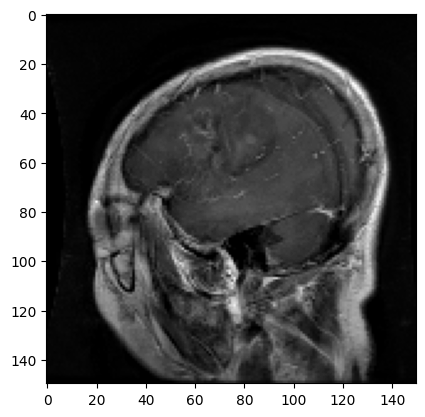

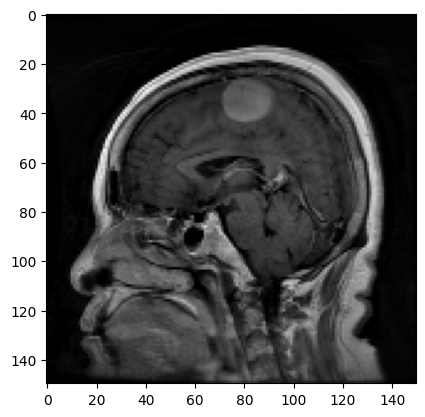

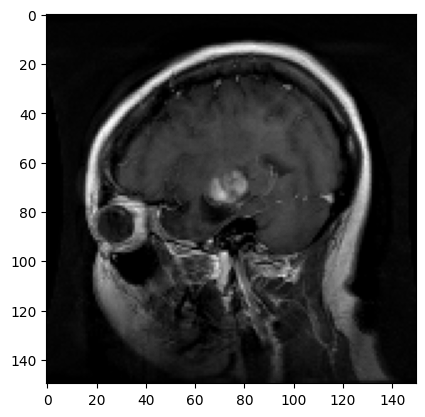

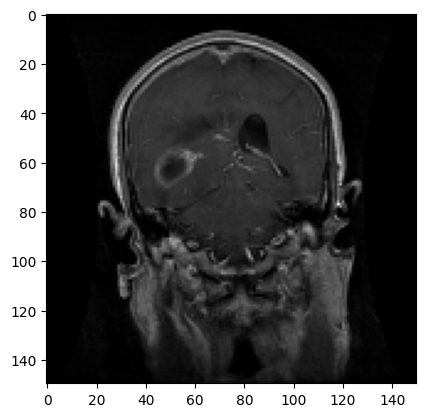

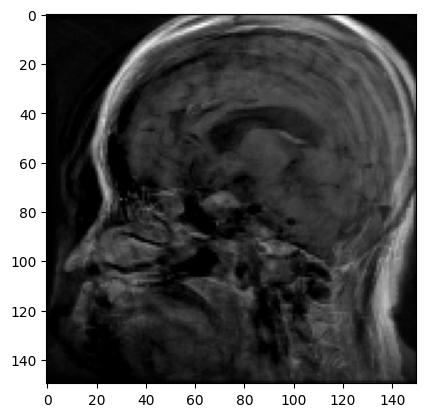

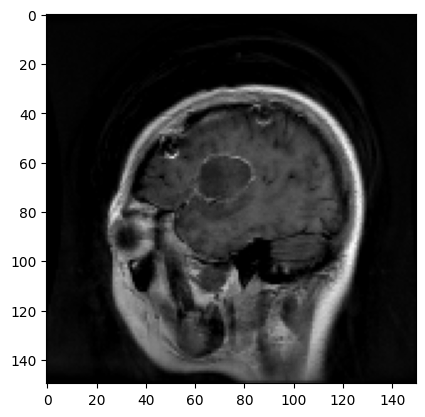

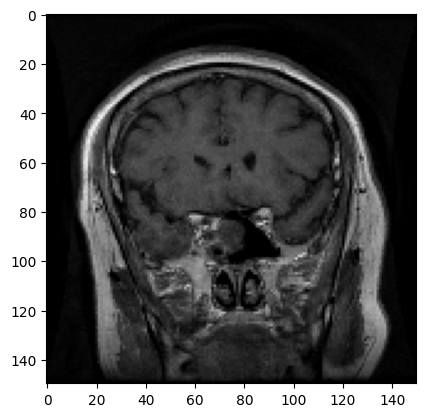

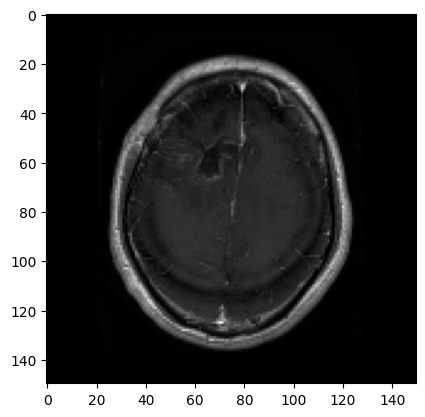

In [ ]:
# Define the desired image size.
size = (150,150)
# Loop through each selected feature index in col.
for i in col:
  # Extract the feature data corresponding to the current index
  image = features[i,:]
  # Reshape the feature data into the specified size.
  image = image.reshape(size)
  # Display the image using a grayscale color map.
  plt.imshow(image, cmap="gray")
  plt.show()

## **New Data Preparation**

In [ ]:
# Select the 8 features from the original features matrix using the indices from col.
X_new = X.iloc[:, col]

In [ ]:
# Split the data into training and test sets with a test size of 25% (and training size of 75%).
test_size = 0.25
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=test_size, stratify=y, random_state=42)

In [ ]:
# Print the count of each class in the test set to verify stratification.
y_test_new.value_counts()

Label
glioma             175
meningioma         175
pituitary tumor    175
notumor            175
Name: count, dtype: int64

In [ ]:
# Create a new DataFrame with the selected features.
df_new = pd.DataFrame(X_new)
# Add the target variable to the new DataFrame.
df_new["Label"] = y
# Define the path where the new DataFrame will be saved.
path = '/content/drive/MyDrive/ProgettoDataMining/selected_df.npy'
# Save the new DataFrame to the specified path in pickle format.
df_new.to_pickle(path)

## **Random Forest with features selection**

In [ ]:
# Initialize the Random Forest Classifier.
rf_model_new = RandomForestClassifier(random_state=40)

# Train the classifier on the training data.
rf_model_new.fit(X_train_new, y_train_new)

# Make predictions on the test data.
y_pred_new = rf_model_new.predict(X_test_new)

Test
['glioma' 'meningioma' 'notumor' 'pituitary tumor']
                 precision    recall  f1-score   support

         glioma       0.55      0.58      0.57       175
     meningioma       0.57      0.49      0.53       175
        notumor       0.89      0.89      0.89       175
pituitary tumor       0.76      0.82      0.79       175

       accuracy                           0.69       700
      macro avg       0.69      0.69      0.69       700
   weighted avg       0.69      0.69      0.69       700









<Figure size 800x600 with 0 Axes>

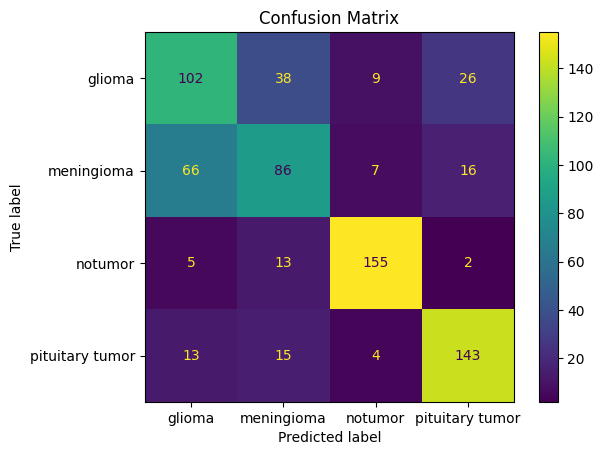





Train
['glioma' 'meningioma' 'notumor' 'pituitary tumor']
                 precision    recall  f1-score   support

         glioma       0.89      1.00      0.94       525
     meningioma       1.00      0.90      0.95       525
        notumor       1.00      0.99      1.00       525
pituitary tumor       1.00      0.98      0.99       525

       accuracy                           0.97      2100
      macro avg       0.97      0.97      0.97      2100
   weighted avg       0.97      0.97      0.97      2100









<Figure size 800x600 with 0 Axes>

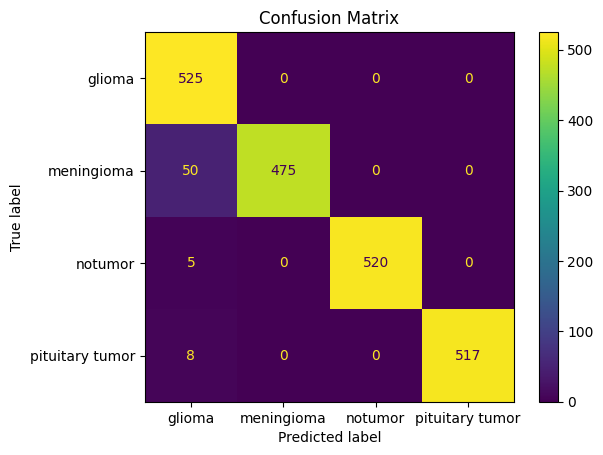

In [ ]:
# Evaluate and print the performance metrics of the model on the test set predictions.
print("Test")
evaluate_metrics(y_pred_new,y_test_new)

# Add space for clarity.
print("\n"*3)

# Evaluate and print the performance metrics of the model on the training set predictions.
print("Train")
evaluate_metrics(rf_model_new.predict(X_train_new),y_train_new)

# **SVC**

## **Hyperparameter Tuning**

In [ ]:
# Initialize the SVC model.
svc = SVC(probability=True)

# Define par for hyperparameter tuning.
par = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.0001, 0.001, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'coef0': [0, 1]
}

# Configure RandomizedSearchCV to perform the hyperparameter tuning.
random_search = RandomizedSearchCV(svc,             # The Support Vector Classifier svc
                                   par,             # The parameters
                                   n_iter=10,       # Number of parameter settings sampled
                                   cv = 5,          # Number of folds for cross-validation
                                   n_jobs=-1,       # Use all available cores for parallel processing
                                   refit = True,    # Refit the best model on the whole dataset
                                   random_state=42) # For reproducibility

# Fit the RandomizedSearchCV model to the training data.
random_search.fit(X_train, y_train)
print('The Model is trained well with the given images')

# Store and print the best set of hyperparameters.
best_params = random_search.best_params_
print(best_params)

# Store and print the best model with the optimal hyperparameters.
svc_best_model = random_search.best_estimator_
print(random_search.best_estimator_)

# Predict on the test set.
y_pred = svc_best_model.predict(X_test)

# Evaluate and print the performance metrics of the model on the test set predictions.
print("Test")
evaluate_metrics(y_pred, y_test)

# Free up memory by deleting variables no longer needed.
del y_pred, random_search
gc.collect()

# Evaluate and print the performance metrics of the model on the training set predictions.
print("Train")
evaluate_metrics(svc_best_model.predict(X_train), y_train)

KeyboardInterrupt: 

## **SVC with features selection**

In [ ]:
# Initialize a SVC model.
svc_new = SVC(**best_params, random_state=40)

# Train the model on the training data.
svc_new.fit(X_train_new, y_train_new)

In [ ]:
# Make predictions on the test data.
y_pred_new = svc_new.predict(X_test_new)

In [ ]:
# Evaluate and print the performance metrics of the model on the test set predictions.
print("Test")
evaluate_metrics(y_pred_new, y_test_new)

# Add space for clarity.
print("\n"*3)

# Evaluate and print the performance metrics of the model on the training set predictions.
print("Train")
evaluate_metrics(svc_new.predict(X_train_new), y_train_new)

# **SAVINGS**

In [ ]:
import joblib

In [ ]:
model_path = '/content/drive/MyDrive/ProgettoDataMining/randomforest.pkl'

# Save the Random Forest Classifier model with the optimal set of hyperparameters obtained with GridSearchCV using joblib.
joblib.dump(model, model_path)

In [ ]:
model_path = '/content/drive/MyDrive/ProgettoDataMining/svc.pkl'

# Save the SVC model with the optimal set of hyperparameters obtained with RandomizedSearchCV using joblib.
joblib.dump(svc_best_model, model_path)